# Preprocessing the Data - The Other Way

In this intriguing assignment, the goal was to exchange our swords - or rather, our feature extraction methods - with a fellow student. This twist meant that I delved into the techniques my peer employed in their dataset, and they ventured into the methods I used in my previous assignment (for reference, see [PreprocessingTheData.ipynb](PreprocessingTheData.ipynb)). It's a fantastic opportunity to step outside our comfort zones and see how our data dances with different partners.

## Feature Extraction Methods

Feature extraction is like finding the magic keys that unlock the most information or the most meaningful signals from our dataset. In this section, I'm going to embark on a journey with the following magical tools:

### 1. Autoencoder

Autoencoders are neural networks designed to learn an efficient representation (encoding) for data, typically for the purpose of dimensionality reduction. They work by compressing the input into a lower-dimensional code and then reconstructing the output from this representation. The beauty of autoencoders lies in their ability to capture the most salient features of the data automatically.

An autoencoder consists of two main parts: the encoder, which compresses the input data, and the decoder, which reconstructs the data from the compressed form. The goal is to minimize the difference between the original input and the reconstructed output, thus forcing the autoencoder to learn a compact representation of the data.

### 2. Mutual Information

Mutual information is a measure from information theory, describing the amount of information obtained about one random variable through observing another random variable. In feature selection, we use it to quantify the "amount of information" a feature gives us about the outcome. It's a powerful way to identify features that contribute most to predicting the target variable, enabling us to focus on relevant data and potentially improve model performance.

### 3. PCA (Principal Component Analysis)

PCA is a statistical technique that converts high-dimensional data into a lower-dimensional form (components) while retaining as much of the variance in the dataset as possible. It's like finding the best angles to view a gemstone, revealing its structure in fewer dimensions. PCA helps in reducing the dimensionality of the data, improving computational efficiency, and sometimes even improving model performance by eliminating noise and redundant features.

### 4. Random Forest

While primarily a machine learning model, Random Forest can also be leveraged for feature extraction. By training a Random Forest model, we can inspect the feature importances attributed by the model, giving us insights into which features it finds most predictive. This method is particularly useful for understanding feature importance in non-linear and complex datasets, helping to highlight which features are most influential in predicting the outcome.

Each of these methods brings a unique perspective on how to unlock the secrets within our data. By experimenting with and understanding these techniques, we gain valuable skills and insights that can be applied across a wide range of data science challenges.

# Initial data preprocessing
Similarly like we had in the previous notebook we would load the EP1.01.txt data as it represents in the best way the rest of the data. Also we would process the "data" colum from string (With "," delimiter) to an array of floats that represent the signals.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data_path = Path('../data')
file_path = data_path / 'EP1.01.txt'

columns = ['id', 'event_id', 'device', 'channel', 'code', 'size', 'data']
data = pd.read_csv(file_path, delimiter='\t', header=None, names=columns)

In [3]:
data.head()

,id,event_id,device,channel,code,size,data
0,67635,67635,EP,AF3,6,260,"4395.384615,4382.564102,4377.435897,4387.17948..."
1,67636,67635,EP,F7,6,260,"4489.230769,4475.384615,4474.358974,4486.66666..."
2,67637,67635,EP,F3,6,260,"4538.461538,4528.717948,4524.615384,4526.15384..."
3,67638,67635,EP,FC5,6,260,"4207.692307,4205.641025,4200.512820,4194.35897..."
4,67639,67635,EP,T7,6,260,"4497.948717,4498.461538,4494.871794,4497.94871..."


In [4]:
def parse_data(data: str) -> list:
    return list(map(float, data.split(',')))

In [5]:
data.loc[:, 'data'] = data['data'].apply(parse_data)

In [6]:
data.head()

,id,event_id,device,channel,code,size,data
0,67635,67635,EP,AF3,6,260,"[4395.384615, 4382.564102, 4377.435897, 4387.1..."
1,67636,67635,EP,F7,6,260,"[4489.230769, 4475.384615, 4474.358974, 4486.6..."
2,67637,67635,EP,F3,6,260,"[4538.461538, 4528.717948, 4524.615384, 4526.1..."
3,67638,67635,EP,FC5,6,260,"[4207.692307, 4205.641025, 4200.51282, 4194.35..."
4,67639,67635,EP,T7,6,260,"[4497.948717, 4498.461538, 4494.871794, 4497.9..."


# 1. Autoencoder
We'll break down the process into the following steps
1. Preprocess the data - Normalize the EEG signal to have zero mean and unit variance
2. Build the autoencoder - Define Autoencoder architecture
3. Train the Autoencoder
4. Feature extraction

## 1. Preprocessing the Data 

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()

In [8]:
data.loc[:, 'normalized_data'] = data['data'].apply(lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten())

In [9]:
data.head()

,id,event_id,device,channel,code,size,data,normalized_data
0,67635,67635,EP,AF3,6,260,"[4395.384615, 4382.564102, 4377.435897, 4387.1...","[0.8441558461291976, 0.5194805129026889, 0.389..."
1,67636,67635,EP,F7,6,260,"[4489.230769, 4475.384615, 4474.358974, 4486.6...","[0.4296875010711574, 0.2187499966674693, 0.203..."
2,67637,67635,EP,F3,6,260,"[4538.461538, 4528.717948, 4524.615384, 4526.1...","[0.945205480183887, 0.684931497701271, 0.57534..."
3,67638,67635,EP,FC5,6,260,"[4207.692307, 4205.641025, 4200.51282, 4194.35...","[0.3440860178980216, 0.3010752656607565, 0.193..."
4,67639,67635,EP,T7,6,260,"[4497.948717, 4498.461538, 4494.871794, 4497.9...","[0.43749997714844824, 0.44999998903124094, 0.3..."


What we essentially did here was to transform the data such that its range would be between 0 and 1. This is a common preprocessing step in machine learning, as it helps to ensure that all features contribute equally to the model and are on a similar scale. Normalizing the data can also help to improve the convergence of optimization algorithms and the overall performance of the model.

## 2. Building the autoencoder

Building an autoencoder involves defining both an encoder and a decoder. The encoder compresses the input data into a lower-dimensional representation, and the decoder attempts to reconstruct the original input data from this compressed representation. Autoencoders are trained to minimize the reconstruction error, often using mean squared error (MSE) or a similar loss function.

In [10]:
import torch
from torch import nn

In [11]:
class SimpleAutoencoder(nn.Module):
    def __init__(self, input_size):
        super(SimpleAutoencoder, self).__init__()
        # Encoder: Linear layer reducing dimensionality from input_size to a compressed representation
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),  # Compressed representation
            nn.ReLU()
        )
        # Decoder: Linear layer reconstructing the original input from the compressed representation
        self.decoder = nn.Sequential(
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Check the length of all the inputs we have in column "size"

In [12]:
data['size'].unique()

array([260, 256, 264, 261, 252, 257, 248, 272, 268, 265, 249, 253, 204,
       320, 269, 276, 244, 273, 196, 228, 292, 224, 280, 212, 232, 240,
       284, 136])

Looks like we have lots of different sizes, lets find the mean size and cut everything to it.

In [13]:
data['size'].describe()

count    910476.000000
mean        259.511901
std           2.319790
min         136.000000
25%         260.000000
50%         260.000000
75%         260.000000
max         320.000000
Name: size, dtype: float64

In [14]:
filtered_data = data[data['size'] == 260]
filtered_data['size'].describe()

count    606214.0
mean        260.0
std           0.0
min         260.0
25%         260.0
50%         260.0
75%         260.0
max         260.0
Name: size, dtype: float64

In [15]:
input_size = filtered_data['size'].unique()[0]
autoencoder = SimpleAutoencoder(input_size)

## 3. Training the Autoencoder
We'll start by creating a dataloader from the dataset we have

In [16]:
filtered_data['normalized_data']

0         [0.8441558461291976, 0.5194805129026889, 0.389...
1         [0.4296875010711574, 0.2187499966674693, 0.203...
2         [0.945205480183887, 0.684931497701271, 0.57534...
3         [0.3440860178980216, 0.3010752656607565, 0.193...
4         [0.43749997714844824, 0.44999998903124094, 0.3...
                                ...                        
908217    [0.8699187022803727, 0.8943089535296451, 0.666...
908218    [0.7868852493079856, 0.7540983645861274, 0.344...
908219    [0.6814159374500832, 0.707964600700933, 0.5044...
908220    [0.846715338856626, 0.9270073008284925, 0.7372...
908221    [0.9819819824567873, 0.9909909824446146, 0.756...
Name: normalized_data, Length: 606214, dtype: object

In [17]:
from torch.utils.data import Dataset, DataLoader
import torch

In [18]:
class EEGDataset(Dataset):
    def __init__(self, dataframe: pd.DataFrame):
        self.data = list(dataframe['normalized_data'])
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        sample = self.data[idx]
        sample = torch.tensor(sample, dtype=torch.float)
        return sample
    
dataset = EEGDataset(filtered_data)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

Now we will set our device agnostic and run some epochs on the data and train the model

In [19]:
device = 'cpu'
# Check if device is mps or Cuda
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'

autoencoder.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

num_epochs = 20
loss = None
for epoch in range(num_epochs):
    for data in dataloader:
        data = data.to(device)
        reconstructed = autoencoder(data)
        loss = criterion(reconstructed, data)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.0101
Epoch [2/20], Loss: 0.0115
Epoch [3/20], Loss: 0.0159
Epoch [4/20], Loss: 0.0200
Epoch [5/20], Loss: 0.0174
Epoch [6/20], Loss: 0.0156
Epoch [7/20], Loss: 0.0162
Epoch [8/20], Loss: 0.0152
Epoch [9/20], Loss: 0.0193
Epoch [10/20], Loss: 0.0169
Epoch [11/20], Loss: 0.0139
Epoch [12/20], Loss: 0.0166
Epoch [13/20], Loss: 0.0127
Epoch [14/20], Loss: 0.0167
Epoch [15/20], Loss: 0.0161
Epoch [16/20], Loss: 0.0189
Epoch [17/20], Loss: 0.0194
Epoch [18/20], Loss: 0.0164
Epoch [19/20], Loss: 0.0166
Epoch [20/20], Loss: 0.0193


## 4. Extracting Features

In [20]:
features = []
for data in DataLoader(dataset, batch_size=64, shuffle=False):
    data = data.to(device)
    feature = autoencoder.encoder(data)
    features.append(feature.cpu().detach().numpy())

# Concatenate all features to get the full feature matrix
features = np.concatenate(features, axis=0)

In [21]:
features

array([[0.45526192, 1.1554267 , 1.0616308 , ..., 0.7489581 , 0.        ,
        0.7328858 ],
       [0.7993545 , 1.2524049 , 0.8884668 , ..., 0.97911376, 0.        ,
        0.78482246],
       [0.5114541 , 1.1949203 , 1.1860669 , ..., 0.7675331 , 0.        ,
        0.9510829 ],
       ...,
       [0.8113965 , 1.2234733 , 0.6693291 , ..., 0.6199871 , 0.        ,
        0.843009  ],
       [0.49160582, 1.3222363 , 1.0109234 , ..., 0.8018951 , 0.        ,
        0.69037956],
       [0.5717048 , 1.3029099 , 0.84159404, ..., 0.6958855 , 0.        ,
        0.65621287]], dtype=float32)

In [22]:
import pandas as pd
features_df = pd.DataFrame(features)

features_df.index = filtered_data.index

features_df = features_df.add_prefix('feature_')

enhanced_data = pd.concat([filtered_data, features_df], axis=1)

In [23]:
enhanced_data.head()

,id,event_id,device,channel,code,size,data,normalized_data,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11
0,67635,67635,EP,AF3,6,260,"[4395.384615, 4382.564102, 4377.435897, 4387.1...","[0.8441558461291976, 0.5194805129026889, 0.389...",0.455262,1.155427,1.061631,0.805608,0.0,0.943690,0.701675,0.0,0.910428,0.748958,0.0,0.732886
1,67636,67635,EP,F7,6,260,"[4489.230769, 4475.384615, 4474.358974, 4486.6...","[0.4296875010711574, 0.2187499966674693, 0.203...",0.799354,1.252405,0.888467,0.278260,0.0,0.906408,0.536715,0.0,0.715140,0.979114,0.0,0.784822
2,67637,67635,EP,F3,6,260,"[4538.461538, 4528.717948, 4524.615384, 4526.1...","[0.945205480183887, 0.684931497701271, 0.57534...",0.511454,1.194920,1.186067,0.834844,0.0,0.846082,0.696207,0.0,0.910888,0.767533,0.0,0.951083
3,67638,67635,EP,FC5,6,260,"[4207.692307, 4205.641025, 4200.51282, 4194.35...","[0.3440860178980216, 0.3010752656607565, 0.193...",0.594311,0.957949,0.775988,0.638800,0.0,0.647001,0.817181,0.0,0.751255,0.729855,0.0,0.567211
4,67639,67635,EP,T7,6,260,"[4497.948717, 4498.461538, 4494.871794, 4497.9...","[0.43749997714844824, 0.44999998903124094, 0.3...",0.465870,1.169497,0.750571,0.542662,0.0,0.780825,0.753747,0.0,0.663317,0.539796,0.0,0.938386


# 2. Mutual Information
In this part we will check which of the features (That we selected from the autoencoder) are the most important for the target variable.

In [24]:
from sklearn.feature_selection import mutual_info_regression

# Selecting the features and target variable
X = enhanced_data.drop(columns=['id', 'event_id', 'device', 'channel', 'code', 'size', 'data', 'normalized_data'])
y = enhanced_data['code']

# Calculating the mutual information
mi = mutual_info_regression(X, y)
mi = pd.Series(mi, index=X.columns)
mi = mi.sort_values(ascending=False)
mi

feature_4     0.001601
feature_1     0.001462
feature_11    0.000741
feature_0     0.000000
feature_2     0.000000
feature_3     0.000000
feature_5     0.000000
feature_6     0.000000
feature_7     0.000000
feature_8     0.000000
feature_9     0.000000
feature_10    0.000000
dtype: float64

This is a powerful insight, as it allows us to focus on the most relevant features when building our predictive model. By understanding which features are most informative, we can potentially improve the performance of our model and gain deeper insights into the underlying patterns in the data.

# 3. PCA (Principal Component Analysis)
In this part we will use PCA to reduce the dimensionality of the data and extract the most important components. This will help us to visualize the data in a lower-dimensional space and identify the key patterns and relationships within the data.

In [25]:
from sklearn.decomposition import PCA

# Fit PCA to the features
pca = PCA(n_components=11) # We have 0-9 numbers shown to subject and (-1) for random signal (Total 11)
pca_features = pca.fit_transform(X)

# Create a DataFrame with the PCA features
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11'])
pca_df.index = X.index

# Concatenate the PCA features with the original data
pca_data = pd.concat([enhanced_data, pca_df], axis=1)
pca_data.head()

,id,event_id,device,channel,code,size,data,normalized_data,feature_0,feature_1,...,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,67635,67635,EP,AF3,6,260,"[4395.384615, 4382.564102, 4377.435897, 4387.1...","[0.8441558461291976, 0.5194805129026889, 0.389...",0.455262,1.155427,...,-0.186176,-0.252067,-0.103699,-0.261278,-0.054889,0.132967,-0.022343,0.044802,0.003463,-1.931473e-09
1,67636,67635,EP,F7,6,260,"[4489.230769, 4475.384615, 4474.358974, 4486.6...","[0.4296875010711574, 0.2187499966674693, 0.203...",0.799354,1.252405,...,-0.233934,0.083719,-0.069251,-0.099269,-0.256856,-0.203068,-0.008230,-0.073466,-0.001332,-3.344383e-10
2,67637,67635,EP,F3,6,260,"[4538.461538, 4528.717948, 4524.615384, 4526.1...","[0.945205480183887, 0.684931497701271, 0.57534...",0.511454,1.194920,...,-0.375242,-0.080646,-0.187795,-0.230869,-0.056041,0.222836,-0.012844,0.107285,0.006070,1.811380e-09
3,67638,67635,EP,FC5,6,260,"[4207.692307, 4205.641025, 4200.51282, 4194.35...","[0.3440860178980216, 0.3010752656607565, 0.193...",0.594311,0.957949,...,0.162741,-0.107652,0.099416,-0.067742,0.021198,0.189811,0.056857,0.096952,0.000021,-6.628804e-10
4,67639,67635,EP,T7,6,260,"[4497.948717, 4498.461538, 4494.871794, 4497.9...","[0.43749997714844824, 0.44999998903124094, 0.3...",0.465870,1.169497,...,0.029363,-0.010490,-0.096604,0.136420,-0.258312,0.056946,0.133549,0.110581,0.001178,1.495177e-06


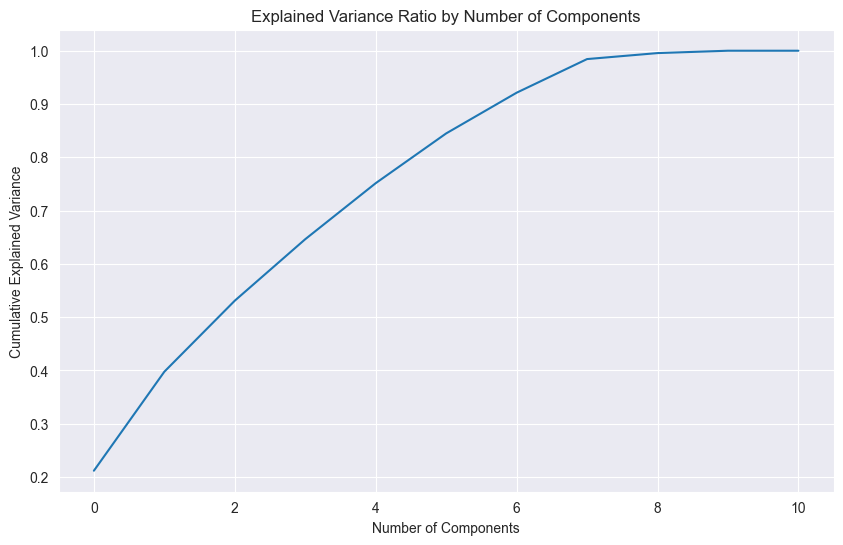

In [26]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()

We see that the first 11 components explain almost 100% of the variance in the data. This means that we can effectively represent the data in a lower-dimensional space while retaining most of the information. By using PCA, we can reduce the dimensionality of the data, improve computational efficiency, and potentially enhance the performance of our predictive model.

# 4. Random Forest
The final feature extraction method we'll explore is Random Forest. We'll train a Random Forest model on the data and examine the feature importances attributed by the model. This will help us to identify which features are most influential in predicting the target variable and gain insights into the underlying patterns in the data.

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
feature_importances = pd.Series(feature_importances, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances

feature_0     0.111297
feature_8     0.111293
feature_9     0.111231
feature_6     0.111178
feature_11    0.111143
feature_5     0.111132
feature_1     0.111069
feature_3     0.110939
feature_2     0.110714
feature_10    0.000003
feature_4     0.000000
feature_7     0.000000
dtype: float64

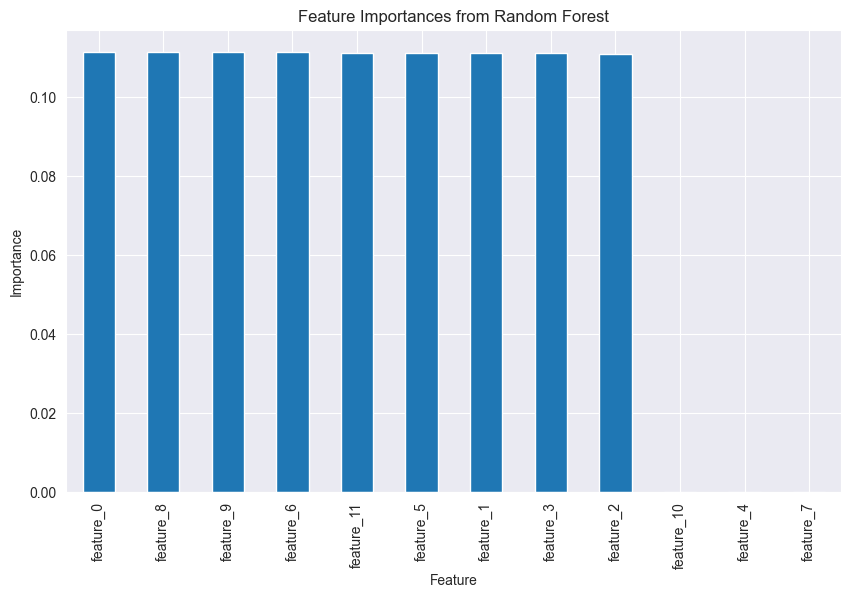

In [28]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

The feature importances from the Random Forest model provide valuable insights into which features are most predictive of the target variable. By understanding the importance of each feature, we can focus on the most relevant data and potentially improve the performance of our predictive model. This method is particularly useful for identifying key patterns and relationships in complex datasets, helping us to extract meaningful information and make informed decisions.

We can see in our case that the features 2, 3 and 8 have 0 value for the importance, this means that they are not important for the target variable and we can remove them from the dataset.

So if we would take the information from the random forest and the mutual information we can clearly see that the features 2, 3 and 8 are not important for the target variable and we can remove them from the dataset without any loss of information. 